Optimization terminated successfully.
         Current function value: 0.252728
         Iterations 8


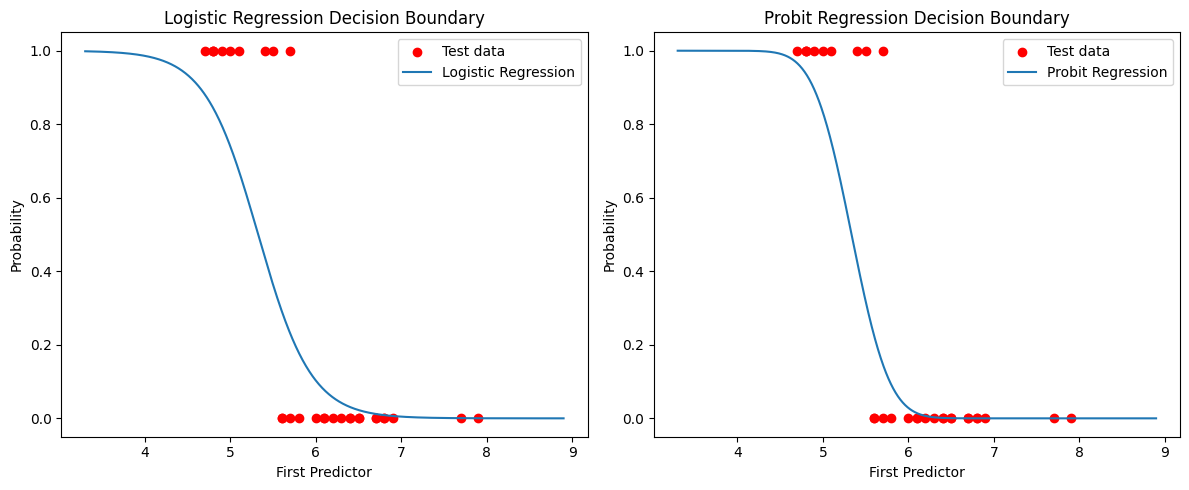

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :1]  # Considering only the first predictor
y = iris.target
y_binary = np.where(y == 0, 1, 0)  # Convert labels to 1 for Setosa and 0 for non-Setosa

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Fit probit regression using statsmodels
X_train = sm.add_constant(X_train)  # Add constant for intercept
probit_model = sm.Probit(y_train, X_train).fit()

# Generate points for decision boundary plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 1000)

# Logistic regression decision boundary
yy_log_reg = log_reg.predict_proba(xx.reshape(-1, 1))[:, 1]

# Probit regression decision boundary
xx_probit = sm.add_constant(xx.reshape(-1, 1))  # Add constant for intercept
yy_probit = probit_model.predict(xx_probit)

# Plot the decision boundaries side by side
plt.figure(figsize=(12, 5))

# Logistic regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, yy_log_reg, label='Logistic Regression')
plt.xlabel('First Predictor')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

# Probit regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(xx, yy_probit, label='Probit Regression')
plt.xlabel('First Predictor')
plt.ylabel('Probability')
plt.title('Probit Regression Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()
